<a href="https://colab.research.google.com/github/anirudh4git/Movie_Recommendation_KNN/blob/main/Movie_recommendation__K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

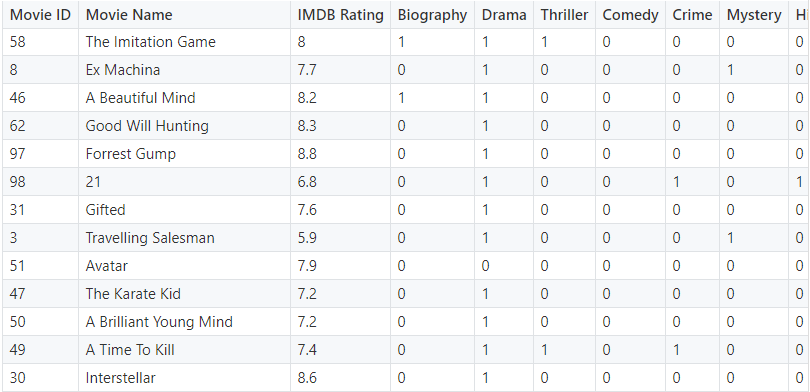

### You can keep all the genres indicators as columns. Suppose in the column genres, you have 20 distinct genres then you will create 20 different indicators.

### Also you need to take any 1000 movies in your train dataset and 10 movies in your test corresponding to which you need to print the 5 most similar movies since kNN becomes computationally intensive as the number of observations increases.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
sns.set()
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Machine Learning/KNN/imdb_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [ ]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## We only need popularity, title and genres columns to get the dataset.

In [ ]:
def str_to_list(x):
  return eval(x)

## Dropping null values from genres columns

In [ ]:
df.dropna(subset=['genres'],inplace=True)

In [ ]:
df['genres'] = df['genres'].apply(str_to_list)

In [ ]:
df['genres'][1]

[{'id': 35, 'name': 'Comedy'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 10749, 'name': 'Romance'}]

In [ ]:
# Function to get the list of genres for each row
def get_genres_list(genre):
  genre_list = []
  for dict_ in genre:
    genre_list.append(dict_.get('name'))
  return genre_list


In [ ]:
df['All_genre'] = df['genres'].apply(get_genres_list)

In [ ]:
df['All_genre']

0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                                  [Drama]
3                        [Thriller, Drama]
4                       [Action, Thriller]
                       ...                
2995                     [Comedy, Romance]
2996                        [Drama, Music]
2997    [Crime, Action, Mystery, Thriller]
2998                     [Comedy, Romance]
2999           [Thriller, Action, Mystery]
Name: All_genre, Length: 2993, dtype: object

In [ ]:
#Scaling the popularity 
scale = StandardScaler()
df['popularity'] = scale.fit_transform(df[['popularity']]) 

In [ ]:
df = df[['title','popularity','All_genre']]

In [ ]:
df['All_genre'].isna().sum()

0

In [ ]:
# Getting a list of list
all_genre_list = []
for dict_ in df.to_dict('records'):
  all_genre_list.append(dict_['All_genre'])

In [ ]:
# Getiing the mega list 
combined_list = []
for list_ in all_genre_list:
  for genre in list_:
    combined_list.append(genre)

In [ ]:
# list of unique genres
unique_genres = list(set(combined_list))

In [ ]:
# Count for each unique genre
genre_count_dict = {}
for genre in unique_genres:
  genre_count_dict[genre] = combined_list.count(genre)


In [ ]:
genre_count_dict

{'Action': 741,
 'Adventure': 439,
 'Animation': 141,
 'Comedy': 1028,
 'Crime': 469,
 'Documentary': 87,
 'Drama': 1531,
 'Family': 260,
 'Fantasy': 232,
 'Foreign': 31,
 'History': 132,
 'Horror': 301,
 'Music': 100,
 'Mystery': 225,
 'Romance': 571,
 'Science Fiction': 290,
 'TV Movie': 1,
 'Thriller': 789,
 'War': 100,
 'Western': 43}

In [ ]:
sorted_values = sorted(genre_count_dict.values(),reverse=True) 
sorted_dict = {}

for i in sorted_values:
    for k in genre_count_dict.keys():
        if genre_count_dict[k] == i:
            sorted_dict[k] = genre_count_dict[k]

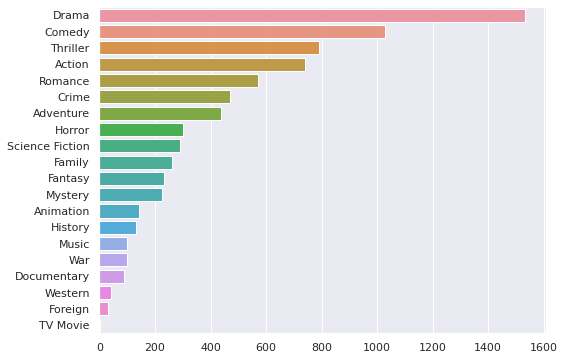

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(y=list(sorted_dict.keys()),x = list(sorted_dict.values()))

## DRAMA , COMEDY, THRILLER, ACTION, ROMANCE are the most prominent genres.

In [ ]:
str(df['All_genre'][1]).strip('[]').replace(' ','')

"'Comedy','Drama','Family','Romance'"

In [ ]:
unique_genres

['Animation',
 'Drama',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'War',
 'Music',
 'Documentary',
 'Science Fiction',
 'Romance',
 'Thriller',
 'Western',
 'Horror',
 'TV Movie',
 'History',
 'Fantasy',
 'Foreign',
 'Mystery',
 'Crime']

In [ ]:
df['Mapping_genre_list'] = np.nan

In [ ]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999],
           dtype='int64', length=2993)

In [ ]:
df.reset_index(inplace = True)

In [ ]:
#Now we have to map each film to its respective generes
for i in range(len(df['All_genre'])):
  list_ = []
  for genre in unique_genres :
    if genre in df['All_genre'][i]:
      list_.append(1)
    else :
      list_.append(0)
  df.loc[i,'Mapping_genre_list'] = str(list_)

In [ ]:
df.head()

,index,title,popularity,All_genre,Mapping_genre_list
0,0,Hot Tub Time Machine 2,-0.157457,[Comedy],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
1,1,The Princess Diaries 2: Royal Engagement,-0.019263,"[Comedy, Drama, Family, Romance]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
2,2,Whiplash,4.609307,[Drama],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,Kahaani,-0.438259,"[Thriller, Drama]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,Marine Boy,-0.605632,"[Action, Thriller]","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
df['Mapping_genre_list'] = df.Mapping_genre_list.apply(str_to_list)

In [ ]:
df['Mapping_genre_list'][1][2]

0

In [ ]:
# Alternate Function
def mapping_genres(genre_list):
  mapping_list = []
  for genre in unique_genres:
    if genre in genre_list:
      mapping_list.append(1)
    else:
      mapping_list.append(0)
  
  return mapping_list

In [ ]:
mapping_genres(df['All_genre'][1])

[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# Alternate Approach
#df['genre_mapping'] = df['All_genre'].apply(mapping_genres)

In [ ]:
df.head()

,index,title,popularity,All_genre,Mapping_genre_list,Romance,Science Fiction,Western,TV Movie,Action,Thriller,Adventure,Documentary,Music,Fantasy,Crime,Mystery,Comedy,Family,Animation,Drama,War,Horror,History,Foreign
0,0,Hot Tub Time Machine 2,-0.157457,[Comedy],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,The Princess Diaries 2: Royal Engagement,-0.019263,"[Comedy, Drama, Family, Romance]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Whiplash,4.609307,[Drama],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,Kahaani,-0.438259,"[Thriller, Drama]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Marine Boy,-0.605632,"[Action, Thriller]","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df[unique_genres] = 0

In [ ]:
df.head()

,index,title,popularity,All_genre,Mapping_genre_list,Romance,Science Fiction,Western,TV Movie,Action,Thriller,Adventure,Documentary,Music,Fantasy,Crime,Mystery,Comedy,Family,Animation,Drama,War,Horror,History,Foreign
0,0,Hot Tub Time Machine 2,-0.157457,[Comedy],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,The Princess Diaries 2: Royal Engagement,-0.019263,"[Comedy, Drama, Family, Romance]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Whiplash,4.609307,[Drama],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,Kahaani,-0.438259,"[Thriller, Drama]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Marine Boy,-0.605632,"[Action, Thriller]","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i,list_ in enumerate(df['All_genre']):
  for genre in list_:
    df[genre][i] = int(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for i, j in enumerate(df['All_genre']):
  print(i,j)

In [ ]:
df.head()

,index,title,popularity,All_genre,Mapping_genre_list,Romance,Science Fiction,Western,TV Movie,Action,Thriller,Adventure,Documentary,Music,Fantasy,Crime,Mystery,Comedy,Family,Animation,Drama,War,Horror,History,Foreign
0,0,Hot Tub Time Machine 2,-0.157457,[Comedy],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,The Princess Diaries 2: Royal Engagement,-0.019263,"[Comedy, Drama, Family, Romance]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
2,2,Whiplash,4.609307,[Drama],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,Kahaani,-0.438259,"[Thriller, Drama]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Marine Boy,-0.605632,"[Action, Thriller]","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop('index',axis = 1,inplace = True)

In [ ]:
df.set_index('title',inplace =True)

In [ ]:
df.drop(['All_genre','Mapping_genre_list'],axis = 1,inplace = True)

In [ ]:
df.head()

,popularity,Romance,Science Fiction,Western,TV Movie,Action,Thriller,Adventure,Documentary,Music,Fantasy,Crime,Mystery,Comedy,Family,Animation,Drama,War,Horror,History,Foreign
title,,,,,,,,,,,,,,,,,,,,,
Hot Tub Time Machine 2,-0.157457,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
The Princess Diaries 2: Royal Engagement,-0.019263,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
Whiplash,4.609307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Kahaani,-0.438259,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Marine Boy,-0.605632,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.values

In [ ]:
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(X)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
query_index = np.random.choice(X.shape[0])
print(query_index)

2464


In [ ]:
query_index = 2

In [ ]:
distances, indices = model_knn.kneighbors(X[query_index].reshape(1, -1), n_neighbors = 6)


In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Collateral Damage:

1: Seeking Justice, with distance of 6.390006715317753e-06:
2: White House Down, with distance of 7.324289996257782e-05:
3: The Last Castle, with distance of 0.00015227728324385126:
4: Jack Ryan: Shadow Recruit, with distance of 0.0012465032739210624:
5: Crimson Tide, with distance of 0.0026056201243929156:


In [ ]:
X[query_index]

array([0.1439652, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 1.       , 1.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       ])